In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/UniversalBank.csv')


In [4]:
X = df.drop(columns=['ID', 'Personal Loan'])  # Features
y = df['Personal Loan']  # Target (Personal Loan)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Step 5: Train and test the SVM model (using linear kernel for simplicity)
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)


In [8]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)


In [9]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

In [10]:
print(f'Accuracy of SVM: {svm_accuracy * 100:.2f}%')
print(f'Accuracy of Logistic Regression: {log_reg_accuracy * 100:.2f}%')
print(f'Accuracy of Random Forest: {rf_accuracy * 100:.2f}%')

# Step 9: Plot the comparison of model accuracies
models = ['SVM', 'Logistic Regression', 'Random Forest']
accuracies = [svm_accuracy, log_reg_accuracy, rf_accuracy]


Accuracy of SVM: 95.30%
Accuracy of Logistic Regression: 95.50%
Accuracy of Random Forest: 99.00%


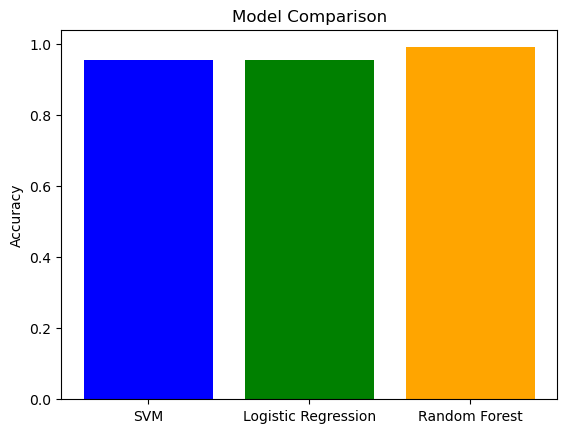

In [11]:
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()